# 1. Configuración inicial y Carga de imágenes

## 1.1 Instalación de librerias necesarias

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

You should consider upgrading via the 'C:\Users\dulibarri\Documents\Programación\python\ImageClassification\imageclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import tensorflow as tf
import os

## 1.2 Filtración de imágenes
Se filtraran las imágenes que no podamos usar en nuestro modelo

In [3]:
import cv2
import imghdr
image_directory = 'images'
image_extensions = ['jpeg', 'jpg', 'bmp', 'png']

In [4]:
# Cantidad de imágenes de carros antes de la filtración
len(os.listdir(os.path.join(image_directory, 'fiddle')))

224

In [5]:
# Cantidad de imágenes de motos antes de la filtración
len(os.listdir(os.path.join(image_directory, 'guitar')))

206

In [32]:
for image_class in os.listdir(image_directory):
    for image in os.listdir(os.path.join(image_directory, image_class)):
        image_path = os.path.join(image_directory, image_class, image)
        try:
            # Checa que podamos cargar la imágen en opencv
            img = cv2.imread(image_path)
            # Checa que nuestra imagen tenga las extension permitida
            img_ext = imghdr.what(image_path)
            if img_ext not in image_extensions:
                print(f'La extención {img_ext} no esta permitida')
                os.remove(image_path)
        except Exception as e:
            print(f'La imagen {image_path} tiene un problema')
            os.remove(image_path)

In [7]:
# Cantidad de imágenes de carros antes de la filtración
len(os.listdir(os.path.join(image_directory, 'fiddle')))

224

In [8]:
# Cantidad de imágenes de motos antes de la filtración
len(os.listdir(os.path.join(image_directory, 'guitar')))

206

## 1.3 Cargar imagenes

In [9]:
import numpy as np
from matplotlib import pyplot as plt
# cargar imagenes, el método se encarga de dividir nuestras imagenes de forma aleatoria en bloques de 32
images = tf.keras.utils.image_dataset_from_directory('images')

Found 430 files belonging to 2 classes.


In [10]:
image_iterator = images.as_numpy_iterator()

In [11]:
# nos permite cambiar el conjunto de imagenes que estamos usando
# label 0 = fiddle
# label 1 = guitar
batch = image_iterator.next()

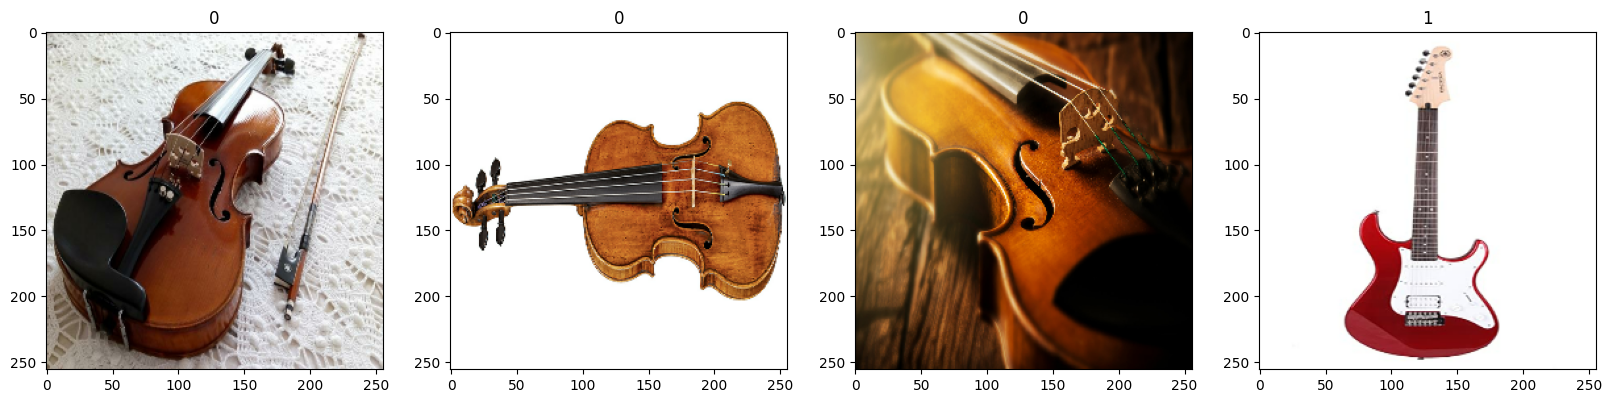

In [12]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocesamiento de imágenes

## 2.1 Escalamiento de las imágenes

In [13]:
# Vamos a cambiar la representación de los valores numéricos de las imagenes de (0 - 255) a (0 - 1)
images = images.map(lambda x, y: (x/255, y))

## 2.2 Dividir las imágenes

In [14]:
len(images)

14

In [15]:
train_size = int(len(images)*.7)
validation_size = int(len(images)*.2)+1
test_size = int(len(images)*.1)+1

In [16]:
train_size + validation_size + test_size

14

In [17]:
# train_data -> Imágenes que se usaran para entrenar el modelo
train_data = images.take(train_size)
# validation_data -> Imágenes que se usaran para evaluar el modelo mientras se entrena
validation_data = images.skip(train_size).take(validation_size)
# test_data -> Imágenes que el modelo nunca ha visto
test_data = images.skip(train_size + validation_size).take(test_size)

# 3. Modelo

## 3.1 Construcción del modelo de Deep Learning

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 3.2 Entrenamiento del modelo

In [23]:
log_directory = 'logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_directory)

In [25]:
hist = model.fit(train_data, epochs = 20, validation_data = validation_data, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 12s 1s/step - loss: 0.8523 - accuracy: 0.4861 - val_loss: 0.6906 - val_accuracy: 0.6146
Epoch 2/20
9/9 [==============================] - 11s 1s/step - loss: 0.6913 - accuracy: 0.5521 - val_loss: 0.6773 - val_accuracy: 0.5938
Epoch 3/20
9/9 [==============================] - 11s 1s/step - loss: 0.6600 - accuracy: 0.7118 - val_loss: 0.6363 - val_accuracy: 0.6250
Epoch 4/20
9/9 [==============================] - 12s 1s/step - loss: 0.6122 - accuracy: 0.6840 - val_loss: 0.6422 - val_accuracy: 0.5938
Epoch 5/20
9/9 [==============================] - 11s 1s/step - loss: 0.5518 - accuracy: 0.7118 - val_loss: 0.6007 - val_accuracy: 0.6667
Epoch 6/20
9/9 [==============================] - 11s 1s/step - loss: 0.4671 - accuracy: 0.8090 - val_loss: 0.4154 - val_accuracy: 0.8333
Epoch 7/20
9/9 [==============================] - 11s 1s/step - loss: 0.3955 - accuracy: 0.8403 - val_loss: 0.2820 - val_accuracy: 0.9062
Epoch 8/20
9/9 [==================

## 3.3 Rendimiento

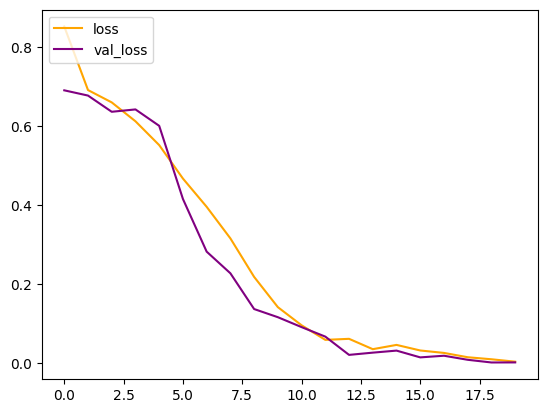

In [26]:
figure = plt.figure()
plt.plot(hist.history['loss'], color='orange', label='loss')
plt.plot(hist.history['val_loss'], color='purple', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

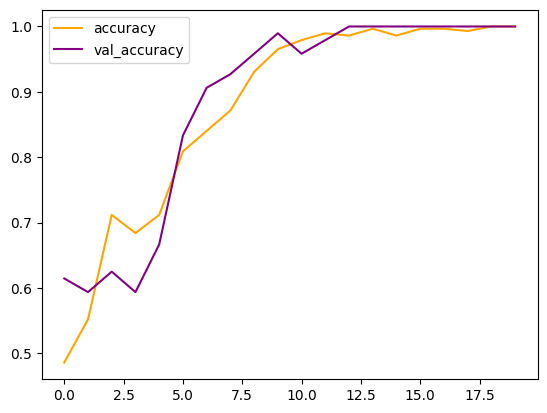

In [27]:
figure = plt.figure()
plt.plot(hist.history['accuracy'], color='orange', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='purple', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# 4. Evaluación del Modelo

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [31]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 140ms/step


In [33]:
print(f'Precision: {precision.result().numpy()}\nRecall: {recall.result().numpy()}\nAccuracy: {accuracy.result().numpy()}')

Precision: 1.0
Recall: 1.0
Accuracy: 1.0
